In [27]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import pylab as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

def parser(x):
    return datetime.strptime('200'+x,'%Y-%m')
 
series = read_csv('/home/ishanu/Dropbox/ZED/Research/CCTS40500_/notebooks/sales.csv',
                  parse_dates=[0],header=None,date_parser=parser,names=['time','sales'])
print(series.head())

        time  sales
0 2001-01-01  266.0
1 2001-02-01  145.9
2 2001-03-01  183.1
3 2001-04-01  119.3
4 2001-05-01  180.3


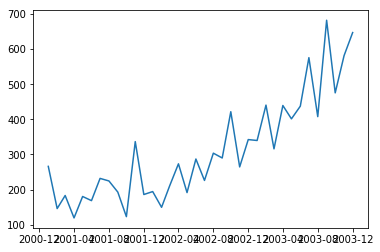

In [6]:
plt.plot(series.time.values,series.sales.values)

In [ ]:
pd.to_datetime(series.Month)

In [10]:
from pandas.plotting import autocorrelation_plot

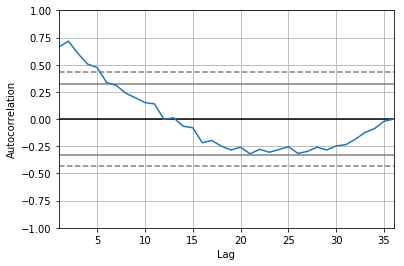

In [11]:
autocorrelation_plot(series.sales)

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
# fit model
series['time']=pd.to_datetime(series.time)
model = ARIMA(series.sales.values,order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 11 Mar 2019   AIC                            406.340
Time:                        15:41:57   BIC                            417.227
Sample:                             1   HQIC                           410.098
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.y     -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.y     -0.6203      0.282     -2.203      0.0

                0
count   35.000000
mean    -5.495243
std     68.132880
min   -133.296623
25%    -42.477919
50%     -7.186686
75%     24.748299
max    133.237952


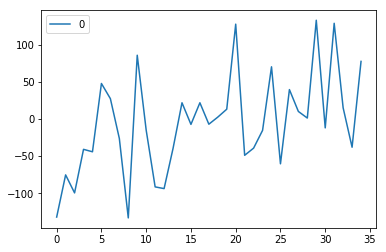

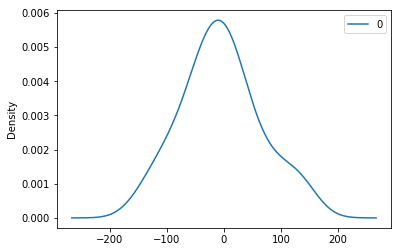

In [24]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
#pyplot.show()
residuals.plot(kind='kde')
#pyplot.show()
print(residuals.describe())

predicted=426.752228, expected=342.300000
predicted=342.322724, expected=339.700000
predicted=415.575609, expected=440.400000
predicted=379.418071, expected=315.900000
predicted=393.701678, expected=439.300000
predicted=378.875200, expected=401.300000
predicted=497.615367, expected=437.400000
predicted=421.250780, expected=575.500000
predicted=505.199508, expected=407.600000
predicted=570.627660, expected=682.000000
predicted=529.954399, expected=475.300000
predicted=720.750304, expected=581.300000
predicted=613.988121, expected=646.900000
Test MSE: 6710.522


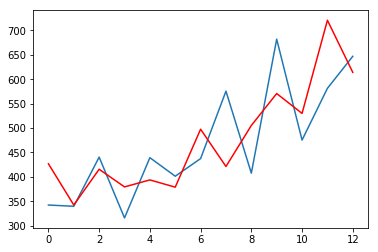

In [29]:
X = series.sales.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()